# Example on using the scalarization methods for scalarizing and minimizing a problem which is based on discrete data

In this example, we will go through the following two topics: 1. How to define a scalarization method for scalarizing discrete data representing a multiobjective optimization problem; 2. How to find a solution to the scalarized problem.

We will start by defining simple 2-dimensional data representing a set of Pareto optimal solutions.

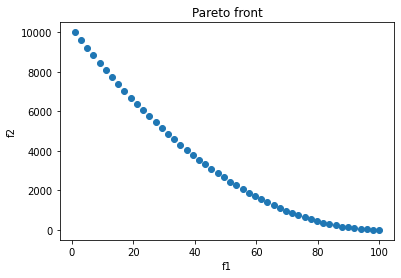

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f1 = np.linspace(1, 100, 50)
f2 = f1[::-1]**2

plt.scatter(f1, f2)
plt.title("Pareto front")
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()

Let us pretend the points represent the Pareto front for a problem with two objectives to be minimized. We can easily determine the ideal and nadir points as follows:

Ideal point: [1. 1.]
Nadir point: [  100. 10000.]


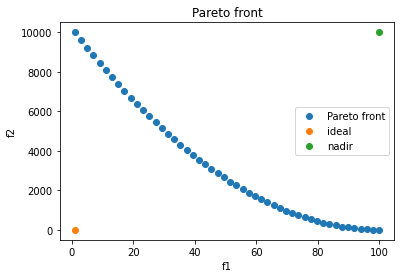

In [2]:
pfront = np.stack((f1, f2)).T

ideal = np.min(pfront, axis=0)
nadir = np.max(pfront, axis=0)

print(f"Ideal point: {ideal}")
print(f"Nadir point: {nadir}")

plt.scatter(f1, f2, label="Pareto front")
plt.scatter(ideal[0], ideal[1], label="ideal")
plt.scatter(nadir[0], nadir[1], label="nadir")
plt.title("Pareto front")
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.show()

Next, suppose we would like to find a solution close to the point (80, 2500), let us define that point as a reference point.

In [3]:
z = np.array([80, 2500])

Clearly, `z` is not on the Pareto front. We can find a closest solution by scalarizing the problem using an achievement scalarizing function (ASF) and minimizing the related achievement scalarizing optimization problem. We will do that next.

In [4]:
from desdeo_tools.scalarization.ASF import PointMethodASF
from desdeo_tools.scalarization.Scalarizer import DiscreteScalarizer
from desdeo_tools.solver.ScalarSolver import DiscreteMinimizer

# define the achievement scalarizing function
asf = PointMethodASF(nadir, ideal)
# the scalarizer
dscalarizer = DiscreteScalarizer(asf, scalarizer_args={"reference_point": z})
# the solver (minimizer)
dminimizer = DiscreteMinimizer(dscalarizer)

solution_i = dminimizer.minimize(pfront)

print(f"Index of the objective vector minimizing the ASF problem: {solution_i}")

Index of the objective vector minimizing the ASF problem: 32


When a scalar problem is minimized using a `DiscreteMinimizer`, the result will be the index of the objective vector in the supplied `vector` argument minimizing the `DiscreteScalarizer` defined in `DiscreteMinimizer`. This is done because it is assumed that the corresponding decision variables are also kept in a vector somewhere, and the variables are ordered in a manner where the `i`th element
in `vectors` corresponds to the `i`th variables in the vector storing the variables.

Anyway, let us plot the solution:

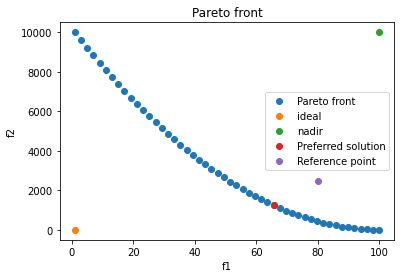

In [5]:
plt.scatter(f1, f2, label="Pareto front")
plt.scatter(ideal[0], ideal[1], label="ideal")
plt.scatter(nadir[0], nadir[1], label="nadir")
plt.scatter(pfront[solution_i][0], pfront[solution_i][1], label="Preferred solution")
plt.scatter(z[0], z[1], label="Reference point")
plt.title("Pareto front")
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.show()

Suppose now that there is the following constraint to our problem: values of `f1` should be less than 50 or more than 77. We can easily deal with this situation as well, and we will conclude our example here.

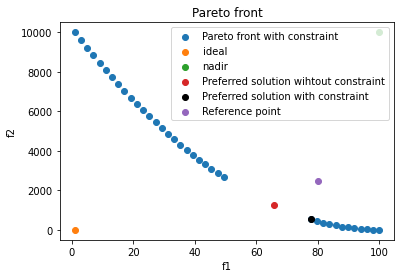

In [6]:
# define the constraint function, it should return either True of False for each
# objective vector defined in its argument.
def con(fs):
    fs = np.atleast_2d(fs)

    return np.logical_or(fs[:, 0] < 50, fs[:, 0] > 77)

dminimizer_con = DiscreteMinimizer(dscalarizer, con)

solution_con = dminimizer_con.minimize(pfront)

mask = con(pfront)
plt.scatter(f1[mask], f2[mask], label="Pareto front with constraint")
plt.scatter(ideal[0], ideal[1], label="ideal")
plt.scatter(nadir[0], nadir[1], label="nadir")
plt.scatter(pfront[solution_i][0], pfront[solution_i][1], label="Preferred solution wihtout constraint")
plt.scatter(pfront[solution_con][0], pfront[solution_con][1], label="Preferred solution with constraint", color="black")
plt.scatter(z[0], z[1], label="Reference point")
plt.title("Pareto front")
plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.show()